## NN Prediction

In [1]:
%load_ext autoreload
%autoreload 2|

In [2]:
PYTHON_PATHS = [".."]
import sys
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)

import torch
import torch.nn as nn
from classifier.resnet18 import Resnet18Model
from data_loader.orb_features_data_module import ORBFeaturesDataModule
import pytorch_lightning as pl

In [3]:
model = Resnet18Model(512, [512], 2, freeze_backbone=False)

Using cache found in /home/alena/.cache/torch/hub/pytorch_vision_v0.10.0


network head
Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=2, bias=True)
)


In [4]:
dataset_module_params = {'root': "/home/alena/Documents/omni-vision/dataset", 
                  'dataset': ["dataset_1_cam_0",
                              "dataset_1_cam_1",
                              "dataset_1_cam_2",
                              "dataset_1_cam_3",
                              "dataset_1_cam_4",
                              "dataset_1_cam_5",
                              "dataset_3_cam_0",
                              "dataset_3_cam_1",
                              "dataset_3_cam_2",
                              "dataset_3_cam_3",
                              "dataset_3_cam_4",
                              "dataset_3_cam_5"
                             ],
                  'classification_threshold': 350,
                  'transform': model.transform,
                  'batch_size': 128+32,
                  'shuffle': True,
                  'num_workers': 6,
                  'num_val': 1000,
                  "num_test": 1000,}

datamodule = ORBFeaturesDataModule(**dataset_module_params)

In [5]:
trainer = pl.Trainer(gpus=1, log_every_n_steps=1, max_epochs=8)
trainer.fit(model, datamodule)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


datasetname: dataset_1_cam_0
num images: 3825
num labels: 3825
datasetname: dataset_1_cam_1
num images: 3824
num labels: 3824
datasetname: dataset_1_cam_2
num images: 3824
num labels: 3824
datasetname: dataset_1_cam_3
num images: 3825
num labels: 3825
datasetname: dataset_1_cam_4
num images: 3826
num labels: 3826
datasetname: dataset_1_cam_5
num images: 3825
num labels: 3825
datasetname: dataset_3_cam_0
num images: 6376
num labels: 6376
datasetname: dataset_3_cam_1
num images: 6376
num labels: 6376
datasetname: dataset_3_cam_2


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


num images: 6376
num labels: 6376
datasetname: dataset_3_cam_3
num images: 6376
num labels: 6376
datasetname: dataset_3_cam_4
num images: 6376
num labels: 6376
datasetname: dataset_3_cam_5
num images: 6376
num labels: 6376



  | Name       | Type       | Params
------------------------------------------
0 | activation | LogSoftmax | 0     
1 | loss       | NLLLoss    | 0     
2 | backbone   | ResNet     | 11.2 M
3 | fc         | Sequential | 526 K 
------------------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.811    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/alena/miniconda3/envs/omni-vision/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:659: UserWarning: Your `val_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [6]:
from torchvision.io import read_image
import pandas as pd
from pathlib import Path
import os
import numpy as np

from data_loader.orb_features_dataset import ORBFeaturesDataset
from tqdm.auto import tqdm

In [7]:
dataset_params = {'root': "/home/alena/Documents/omni-vision/dataset", 
                  'datasets': [
                              "dataset_2_cam_0",
                              "dataset_2_cam_1",
                              "dataset_2_cam_2",
                              "dataset_2_cam_3",
                              "dataset_2_cam_4",
                              "dataset_2_cam_5"
                             ],
                  'classification_threshold': 350,
                  'transform': model.transform,
                  'combine_data': False
                 }

dataset = ORBFeaturesDataset(**dataset_params)

datasetname: dataset_2_cam_0
num images: 2546
num labels: 2546
datasetname: dataset_2_cam_1
num images: 2546
num labels: 2546
datasetname: dataset_2_cam_2
num images: 2546
num labels: 2546
datasetname: dataset_2_cam_3
num images: 2546
num labels: 2546
datasetname: dataset_2_cam_4
num images: 2546
num labels: 2546
datasetname: dataset_2_cam_5
num images: 2546
num labels: 2546


In [8]:
dataset.images_list[0]

array(['/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/000000.png',
       '/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/000001.png',
       '/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/000002.png',
       ...,
       '/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/002543.png',
       '/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/002544.png',
       '/home/alena/Documents/omni-vision/dataset/dataset_2_cam_0/images/002545.png'],
      dtype='<U75')

In [9]:
# dataset_params1 = {'root': "/home/alena/Documents/omni-vision/dataset", 
#                   'datasets': [
# #                               "dataset_1_cam_0",
#                               "dataset_2_cam_1",
#                               "dataset_2_cam_2",
#                               "dataset_2_cam_3",
#                               "dataset_2_cam_4",
#                               "dataset_2_cam_5"
#                              ],
#                   'classification_threshold': 300,
#                   'transform': model.transform,
#                   'combine_data': False
#                  }

# dataset1 = ORBFeaturesDataset(**dataset_params1)

In [10]:
# for i in range(len(dataset1.labels)):
#     plt.subplots(figsize=(8, 2))
#     plt.title(f"Number of ORB features on sequence{0}, camera{i}")
#     plt.xlabel("frame num")
#     plt.ylabel("num features")
#     plt.plot(dataset1.features_list[i])
#     plt.show();

In [11]:
def read_dataset_img(img_path, tranform):
    image = read_image(img_path)[None, ...]
    return tranform(image)

In [12]:
model = model.cuda()
model = model.eval()

In [13]:
predictions = []
import time
tt = []
for d in tqdm(dataset.images_list):
    preds= []
#     images_batch = []
    for img_path in tqdm(d):
        img = read_dataset_img(img_path, model.transform)
#         images_batch.append(img)
#         if len(images_batch) == 6:
#             batch = torch.cat(images_batch)
#             a = time.time()
#             batch = batch.cuda()
#             torch.nn.functional.softmax(model.forward(batch), dim=1)
#             tt.append(time.time() - a)
#             images_batch = []
        preds.append(torch.nn.functional.softmax(model.forward(img.cuda()), dim=1).detach().cpu().numpy())
#     print(sum(tt) / len(tt))
#     tt=[]
    predictions.append(preds)
    
labels = dataset.labels

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

  0%|          | 0/2546 [00:00<?, ?it/s]

In [14]:
pred = []
pred_proba = []
for p in predictions:
    pred_proba.append(np.squeeze(np.array(p), axis=1))
    pred.append(np.argmax(pred_proba[-1], axis=1))

## Camera Switch

In [180]:
# def choose_two_best(valid_cams, cams_proba, num_cams=2):
#     if sum(valid_cams) == num_cams:
#         idx = np.where(valid_cams == True)
#         return idx[0], idx[1]
    
#     elif sum(valid_cams) > num_cams:
#         # find indexes of two maximal values in probabilities class 1
#         idx = np.argpartition(cam_proba[:, 1], -num_cams)[-num_cams:]
#         return idx[0], idx[1]
    
#     elif sum(valid_cams) < 2:
#         # find indexes of two minims values in probabilities class 0
#         idx = np.argpartition(cam_proba[:, 1], -2)[-2:]
#         return idx[0], idx[1]
        

def get_valid_cams(idx, pred, pred_proba, cameras, orig=False, Tr=False, tr=0.01, db=False):
    valid_cams = [p[idx] for p in pred]
    if orig:
        cams_proba = [p[idx][0][1] for p in pred_proba]
    else:
        cams_proba = [p[idx] for p in pred_proba]
    
    #     cam_ids = np.argpartition(cams_proba, -2)[-2:]
    cam_ids = np.argmax(cams_proba)
    if len(cameras) != 0:
        if type(cameras[0]) != 'list' and Tr:
#             print(cams_proba[cameras[-1]])
#             print('-------')
# #             print(cam_ids)
#             print(cams_proba[cam_ids])
            if cams_proba[cameras[-1]] > cams_proba[cam_ids] + tr:
                cam_ids = cameras[-1]
#     print(cam_ids[0, 0, 1])
    return cam_ids

In [181]:
[p.shape[0] for p in pred]

[2546, 2546, 2546, 2546, 2546, 2546]

In [182]:
predictions[0][0]

array([[2.2544016e-09, 1.0000000e+00]], dtype=float32)

In [183]:
# type(all_proba_predictions)

In [186]:
N = pred[0].shape[0]- 1 # all cameras sequence the dame length
cameras = []




all_proba_predictions = []
for j in range(len(pred_proba)):
    new_prediction = [pred_proba[j][:, 1][0]]
    for i in range(pred_proba[j][:, 1].shape[0]):
        val = pred_proba[j][:, 1][i]
        a = 0.15
        new_prediction.append(new_prediction[-1]* (1-a) + val * a)
    all_proba_predictions.append(new_prediction)


cam_original = []
cam_pred_smoothed = []
cam_pred_smoother_tresh = []
cam_tresh = []

tr_ = 10e6
for i in range(N):
    cam1 = get_valid_cams(i, pred, predictions, cameras, orig=True)       
    cam_original.append(cam1)
    
    cam1 = get_valid_cams(i, pred, all_proba_predictions, cameras)       
    cam_pred_smoothed.append(cam1)
    cameras.append([cam1, cam1])
        
    cam1 = get_valid_cams(i, pred, all_proba_predictions, cam_pred_smoothed, Tr=True, tr=tr_)       
    cam_pred_smoother_tresh.append(cam1)
    
#     cameras.append([cam1, cam1])
#     print('****')
    cam1 = get_valid_cams(i, pred, predictions, cam_original, Tr=True, tr=tr_, orig=True, db=True)   
#     print('c1', cam1)
    cam_tresh.append(cam1)
    

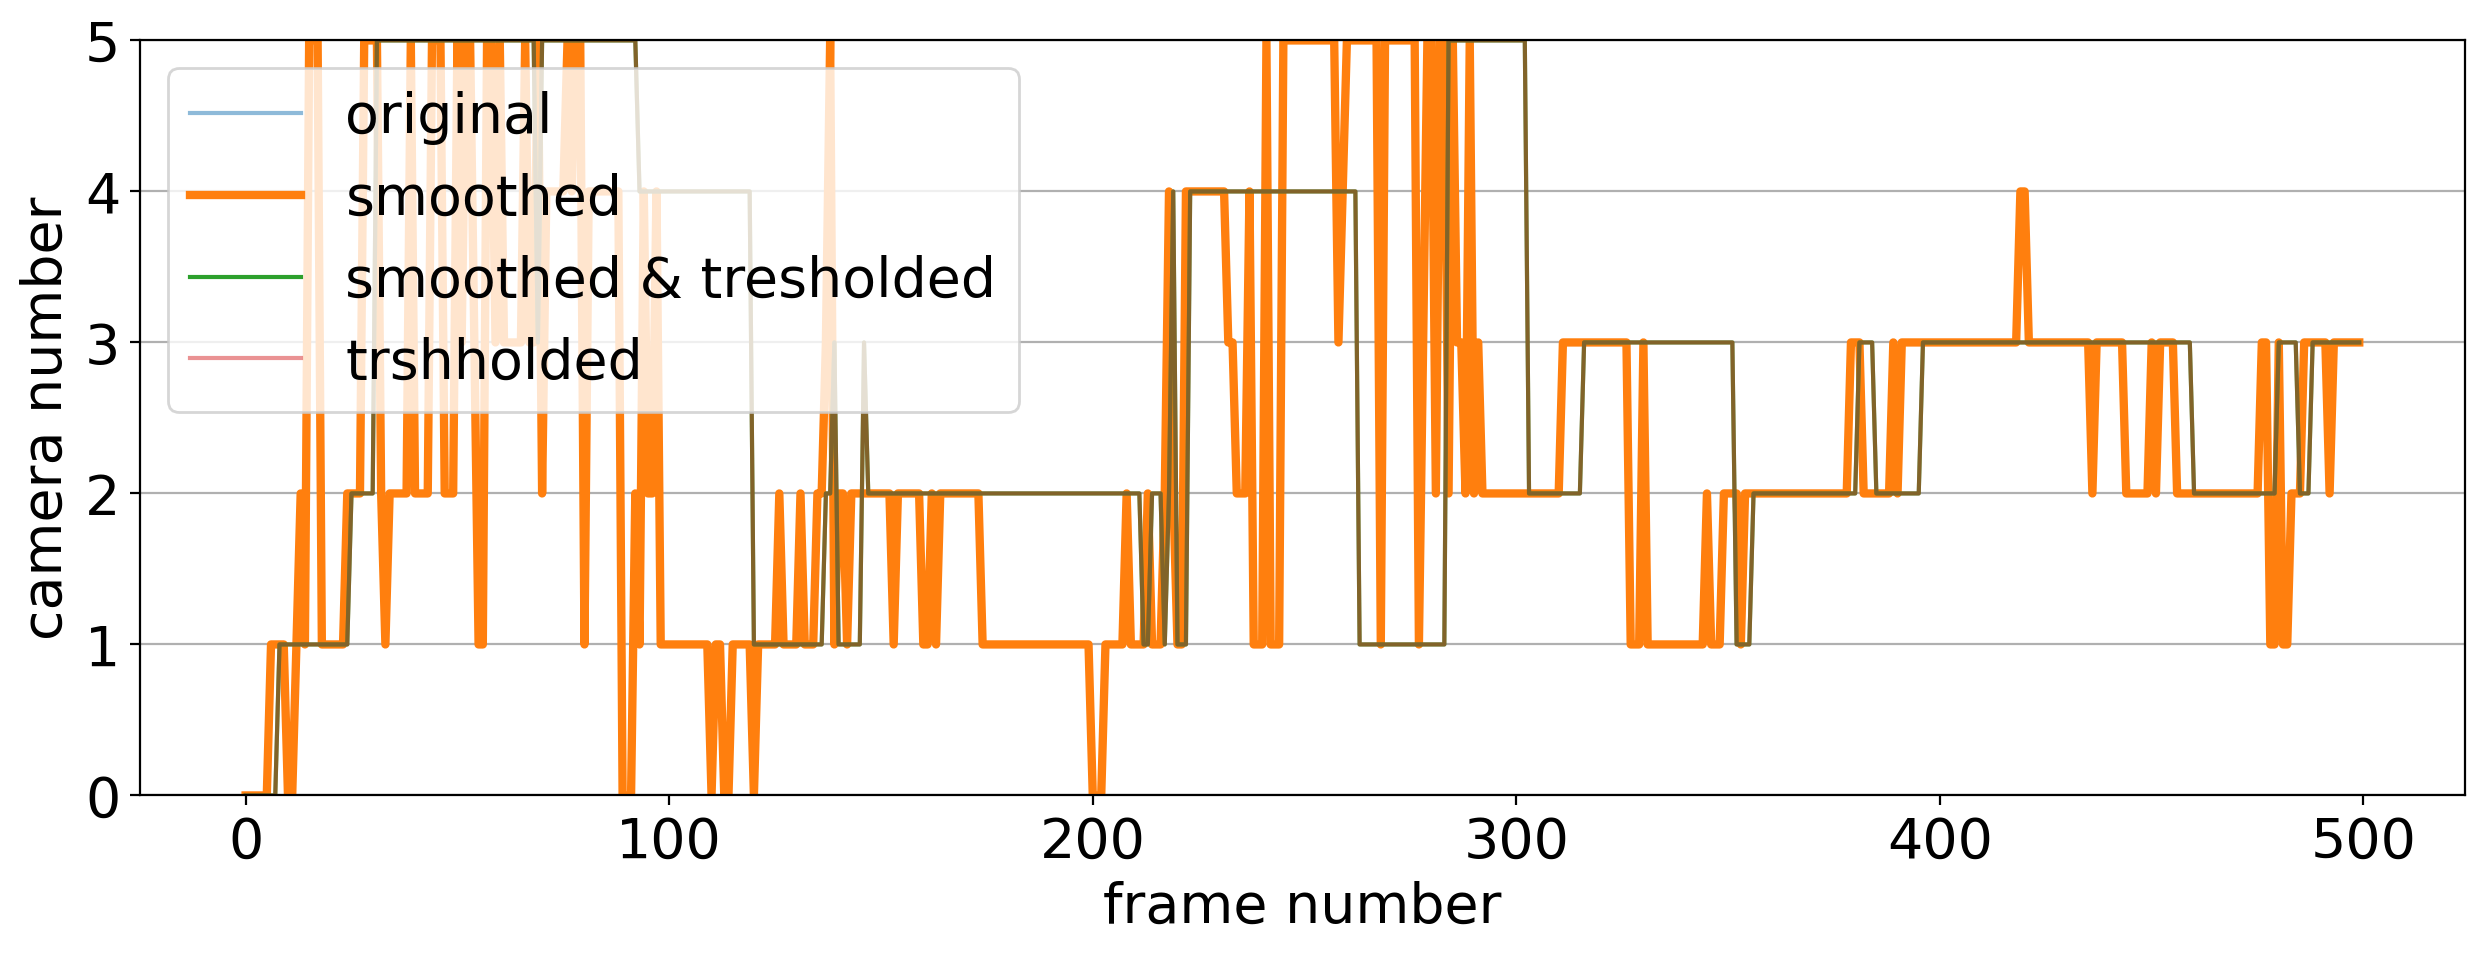

In [185]:
import matplotlib.pyplot as plt
sfont=20
plt.subplots(figsize=(15, 5), dpi=200)
# plt.title(f"Camera switches")
plt.xlabel("frame number", fontsize=sfont)
plt.ylabel("camera number", fontsize=sfont)
plt.ylim([0, 5])
plt.xticks(fontsize=sfont)
plt.yticks(fontsize=sfont)
plt.grid(axis='y')
plt.plot(cam_original[:500], alpha=0.5)
plt.plot(cam_tresh[:500], linewidth=3)
plt.plot(cam_pred_smoothed[:500])
plt.plot(cam_pred_smoother_tresh[:500], alpha=0.5)
# plt.plot(cam_pred_smoothed[:500])
plt.legend(["original", "smoothed", "smoothed & tresholded", 'trshholded'], fontsize=sfont)
# plt.savefig('camera_swithches.png')
plt.show();

In [187]:
cam1_data = []
cam2_data = []

for i in range(len(cameras)):
    cam1_data.append(dataset.features_list[cameras[i][0]][i])
    cam2_data.append(dataset.features_list[cameras[i][1]][i])

## Visualization

In [188]:
from torchvision.io import read_image
import pandas as pd
from pathlib import Path
import os
import numpy as np

PYTHON_PATHS = ["../orb-classification/"]
import sys
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)

from data_loader.orb_features_dataset import ORBFeaturesDataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

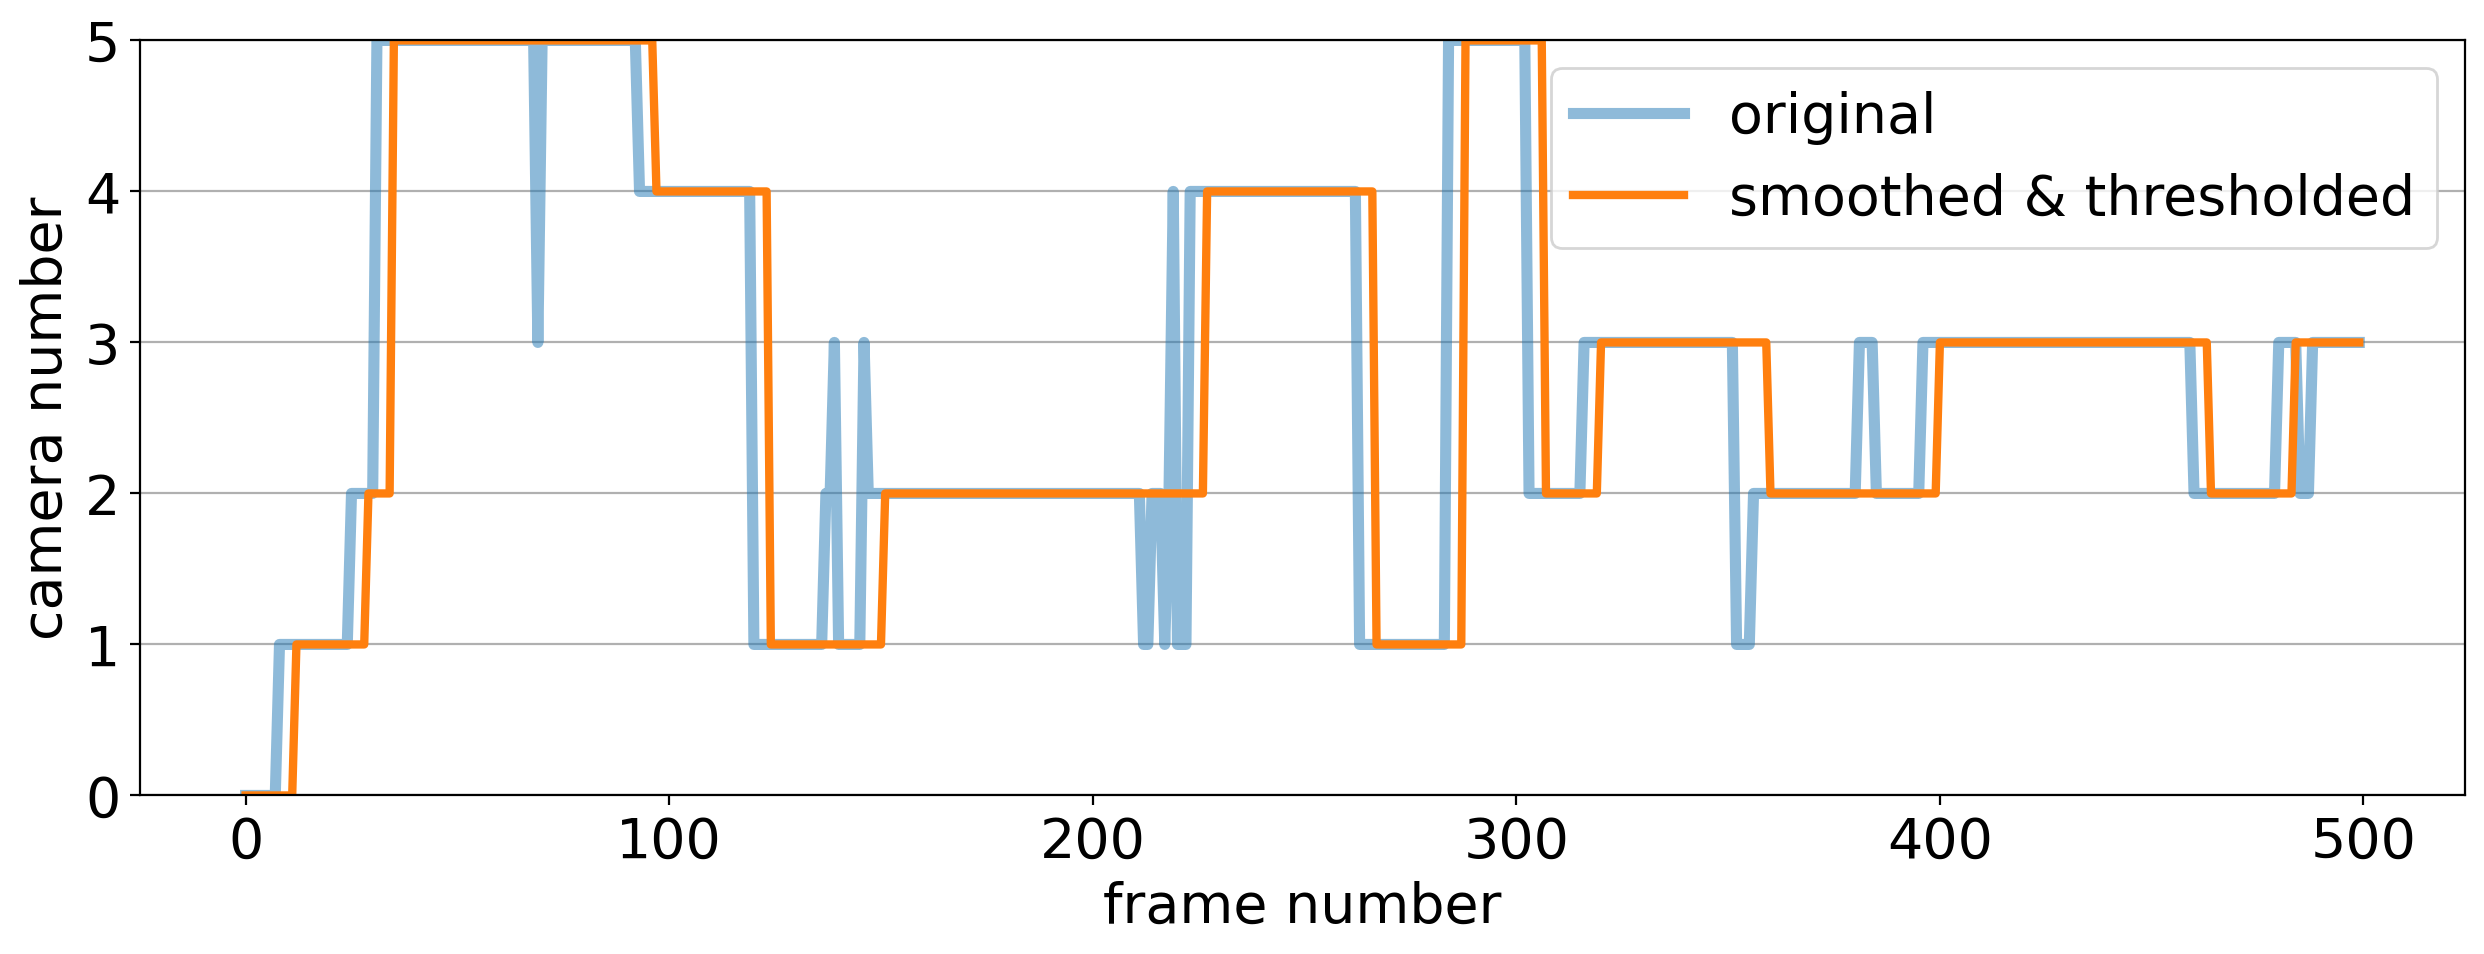

In [35]:
c1 = [cameras[0][0]]
c2 = []
c1n = []
m = 0
N = 2000
for cam in cameras[1:]:
    a = 0.5
    c1n.append(c1[-1]*a + cam[0]*(1-a))
    c1.append(cam[0])
    c2.append(cam[1])
    
# cur_c = c1n[0]
# cur_i = 0
# thr = 25
# c_new = []
# for i, c in enumerate(c1):
#     if c != cur_c and (i - cur_i) > thr:
#         cur_i = i
#         cur_c = c
#     c_new.append(cur_c)

c1 = cam_pred_smoothed

best_camera = c1[0]
num_frames_of_new_cam = 0
thr = 2
new_cam = None

cN = []

for i, c in enumerate(c1):
    if c != best_camera:
        if c == new_cam:
            if num_frames_of_new_cam > thr:
                num_frames_of_new_cam = 0
                best_camera = new_cam
            else:
                num_frames_of_new_cam += 1
        else:
            new_cam = c
            num_frames_of_new_cam = 0
    else:
        new_cam = None
        num_frames_of_new_cam = 0
    cN.append(best_camera)



sfont=20
plt.subplots(figsize=(15, 5), dpi=200)
# plt.title(f"Camera switches")
plt.xlabel("frame number", fontsize=sfont)
plt.ylabel("camera number", fontsize=sfont)
plt.ylim([0, 5])
plt.xticks(fontsize=sfont)
plt.yticks(fontsize=sfont)
plt.grid(axis='y')
# plt.scatter(np.arange(m, N), c1[m:N])
# plt.plot(my_cam[:N], linewidth=3)
plt.plot(c1[:500], alpha=0.5, linewidth=4)
plt.plot(cN[:500], linewidth=3)
# plt.plot(c_new[:500], linewidth=3)
plt.legend(["original", "smoothed & thresholded"], fontsize=sfont)
# plt.plot(c1[:500])
plt.savefig(f'camera_swithches{iters}.png')
plt.show();
iters +=1 

In [26]:
np.arange(0, N)[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
my_cam = [0]*258 + [2]*135 + [3]*147 + [2] * 443 + [5]*200 + [2] * 173 + [4] * 144 + \
[1] * 187  + [4] * 157 + [5] * 156
len(my_cam)

2000

In [107]:
97 + 153

250

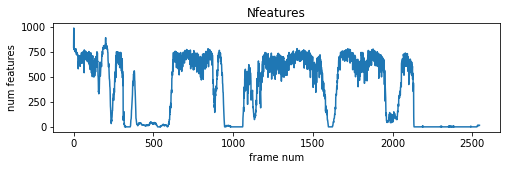

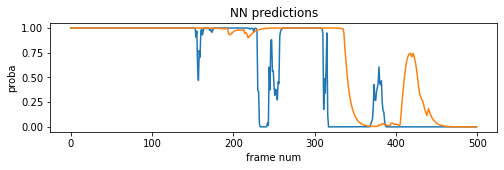

In [30]:
plt.subplots(figsize=(8, 2))
plt.title(f"Nfeatures")
plt.xlabel("frame num")
plt.ylabel("num features")
plt.plot(dataset.features_list[0])
# plt.plot(cam2_data_s)
plt.show()

plt.subplots(figsize=(8, 2))
plt.title(f"NN predictions")
plt.xlabel("frame num")
plt.ylabel("proba")
plt.plot(pred_proba[0][:, 1][:500])
plt.plot(new_prediction[:500])
# plt.plot(cam1_data_s)
plt.show()

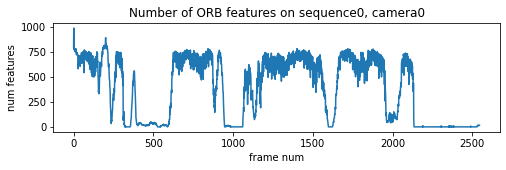

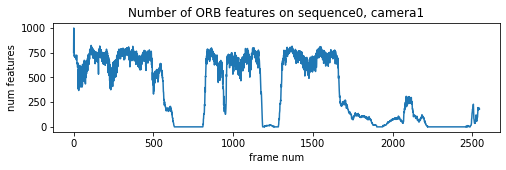

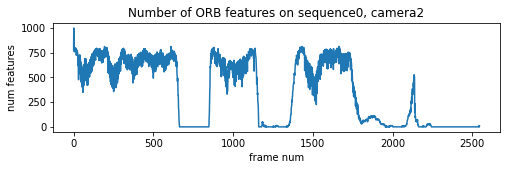

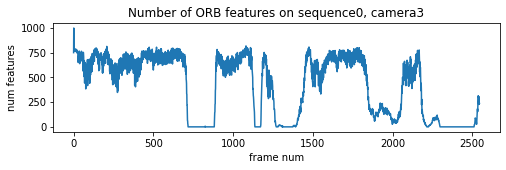

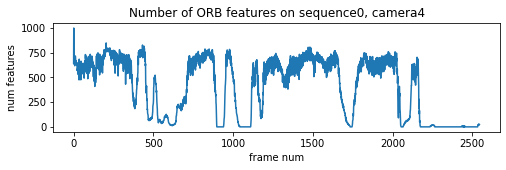

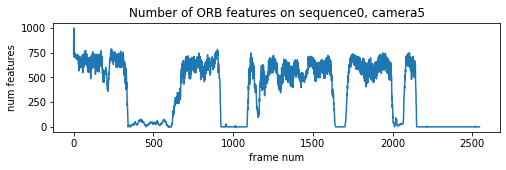

In [31]:
for i in range(len(dataset.labels)):
    plt.subplots(figsize=(8, 2))
    plt.title(f"Number of ORB features on sequence{0}, camera{i}")
    plt.xlabel("frame num")
    plt.ylabel("num features")
    plt.plot(dataset.features_list[i])
    plt.show();

In [231]:
running_mean_coeff = 20

def running_mean(x, N=running_mean_coeff):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

cam_features = []
for i in range(len(dataset.labels)):
    cam_features.append(running_mean(dataset.features_list[i]))



############## WHAT SMOOTHING TO USE ############
# cam1_data_s = []
# cam2_data_s = []

# for i in range(len(cameras[10:-10])):
#     cam2_data_s.append(cam_features[cameras[i][0]][i])
    
#     cam1_data_s.append(cam_features[cameras[i][1]][i])

    
cam2_data_s = running_mean(cam2_data)
cam1_data_s = running_mean(cam1_data)

In [38]:
dataset.features_list[0].shape

(2546,)

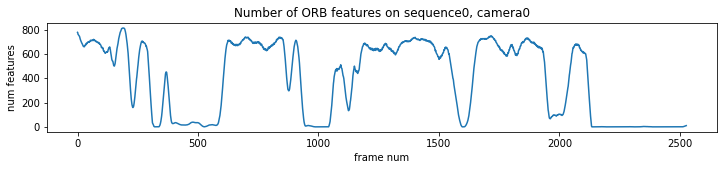

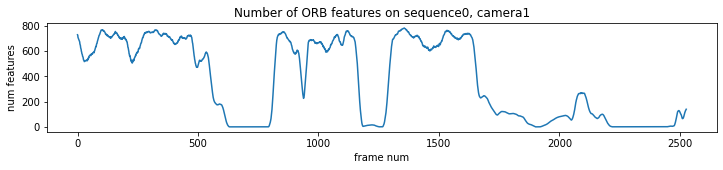

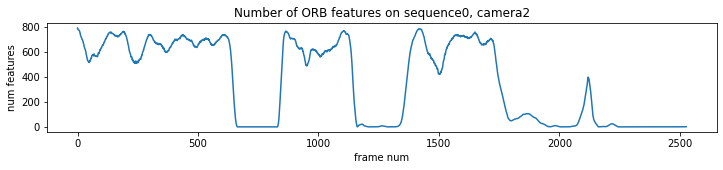

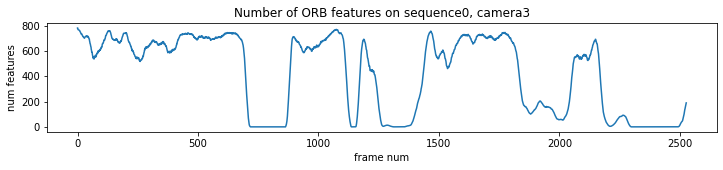

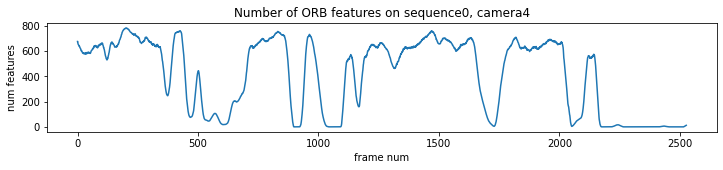

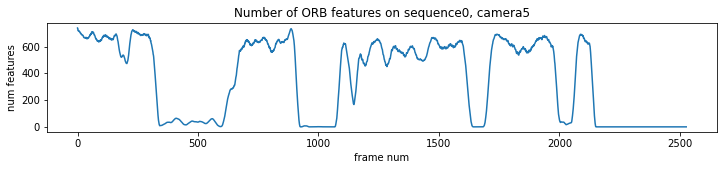

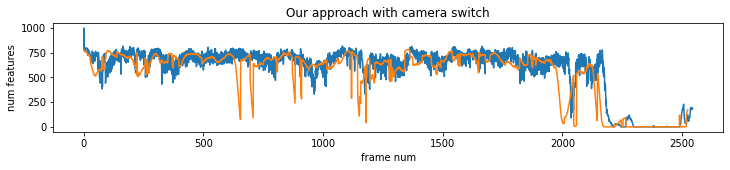

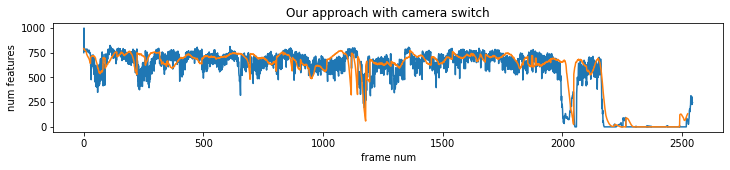

In [39]:
fz = (12, 2)

for i in range(len(dataset.labels)):
    plt.subplots(figsize=fz)
    plt.title(f"Number of ORB features on sequence{0}, camera{i}")
    plt.xlabel("frame num")
    plt.ylabel("num features")
#     plt.plot(dataset.features_list[i])
    plt.plot(cam_features[i])
    plt.show();


plt.subplots(figsize=fz)
plt.title(f"Our approach with camera switch")
plt.xlabel("frame num")
plt.ylabel("num features")
plt.plot(cam2_data)
plt.plot(cam2_data_s)
plt.show()

plt.subplots(figsize=fz)
plt.title(f"Our approach with camera switch")
plt.xlabel("frame num")
plt.ylabel("num features")
plt.plot(cam1_data)
plt.plot(cam1_data_s)
plt.show()

In [239]:
cam_mean = cam_features[0].copy()

for cam_feature in cam_features[1:]:
    cam_mean += cam_feature
cam_mean = cam_mean / 6.

In [240]:
np.round(np.sum(cam_mean) / cam_mean.shape[0], 2)

247980.36

In [243]:
np.round(np.mean(cam2_data_s[:2000]), 2)

687.76

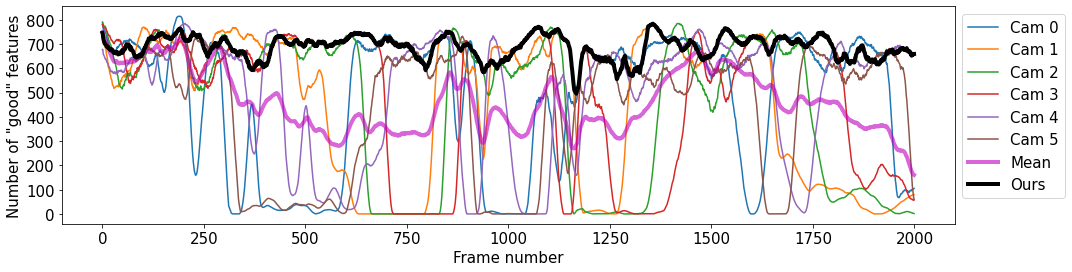

In [236]:
legend_str = [f"Cam {i}" for i in range(len(dataset.labels))]

legend_str.append("Mean")
legend_str.append("Ours")

n = 0
m = 2000
nsize=15

plt.subplots(figsize=(16, 4))
# plt.title(f"Number of matched ORB features on Sequence {2}", fontsize=nsize)
plt.xlabel("Frame number", fontsize=nsize)
plt.ylabel('Number of "good" features', fontsize=nsize)
for cam_feature in cam_features:
    plt.plot(cam_feature[n:m])

    
plt.plot(cam_mean[n:m], linewidth=4, color='m', alpha=0.6)
plt.plot(cam2_data_s[n:m], linewidth=4, color='k')
plt.legend(legend_str, fontsize=nsize, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xticks(fontsize=nsize)
plt.yticks(fontsize=nsize)

plt.savefig(f"{n}-{m}-1-mean.png", bbox_inches='tight', dpi=400)
plt.show();

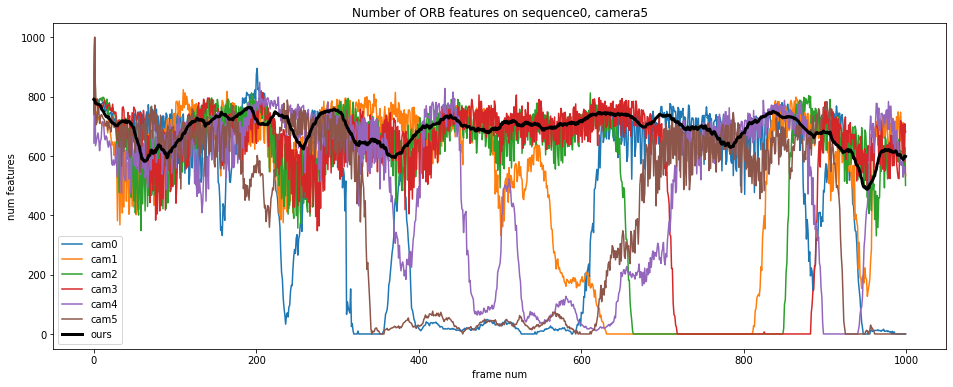

In [36]:
legend_str = [f"cam{i}" for i in range(len(dataset.labels))]
legend_str.append("ours")

n = 0
m = 1000


plt.subplots(figsize=(16, 6))
plt.title(f"Number of ORB features on sequence{0}, camera{i}")
plt.xlabel("frame num")
plt.ylabel("num features")
for i in range(len(cam_features)):
    plt.plot(dataset.features_list[i][n:m])

plt.plot(cam2_data_s[n:m], linewidth=3, color='k')
plt.legend(legend_str)
plt.show();

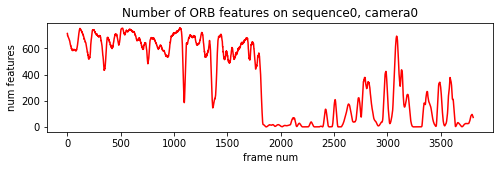

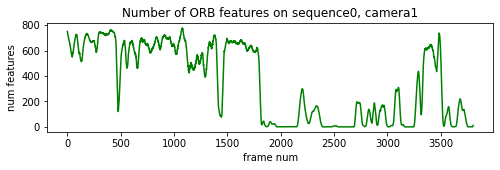

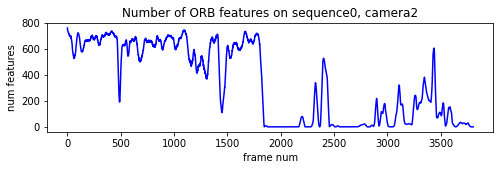

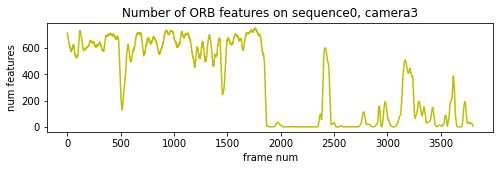

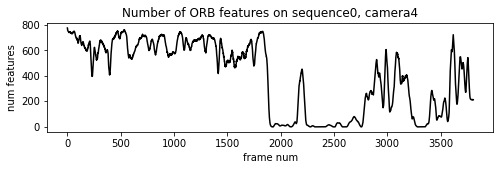

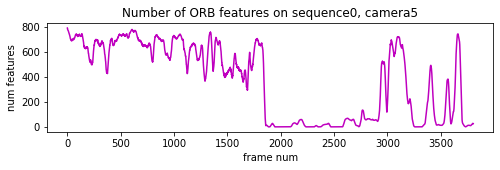

In [177]:
c='rgbykm'
for i in range(len(dataset.labels)):
    plt.subplots(figsize=(8, 2))
    plt.title(f"Number of ORB features on sequence{0}, camera{i}")
    plt.xlabel("frame num")
    plt.ylabel("num features")
    plt.plot(cam_features[i], color=c[i])
    plt.show();

In [178]:
cameras[0][0]

0

In [179]:
import plotly.graph_objects as go

dataset_size = len(dataset.labels)
# x = np.linspace(0, dataset_size, dataset_size)
# y = dataset.features_list[0]

for i in range(dataset_size):
    fig = go.Figure()
    y = dataset.features_list[i][:500]
    x = np.linspace(0, y.shape[0], y.shape[0])
    
    fig.add_trace(go.Bar(x=x, y=y))

    fig.show()

## Validation NN accuracy

In [53]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc

y_pred = pred
y_true = labels

fprs = []
tprs = []
cms = []

accuracy_vals = []
f1_score_vals = []
precision_vals = []
fps = []
fns = []
tps = []
tns = []


for i in range(len(y_pred)):
    
    accuracy_vals.append(np.round(accuracy_score(y_true[i], y_pred[i]), 3))
    precision_vals.append(np.round(precision_score(y_true[i], y_pred[i], average='micro'), 3))
    f1_score_vals.append(np.round(f1_score(y_true[i], y_pred[i]), 3))
    
    cm = confusion_matrix(y_true[i], y_pred[i])
    
    fps.append(cm[0, 1])
    fns.append(cm[1, 0])
    
    tps.append(cm[1, 1])
    tns.append(cm[0, 0])
    
#     print(f"Camera {i} sequence \n")
#     print("precision score:", precision_score(y_true[i], y_pred[i], average='micro'), '\n')
#     # number of (tp + tn) / (all) 
#     print("accuracy score:", accuracy_score(y_true[i], y_pred[i]), '\n')
#     # mean between precision and recall
#     print("f1_score:", f1_score(y_true[i], y_pred[i]), '\n')
#     # 
#     fpr, tpr, thresholds = roc_curve(y_true[i], y_pred[i])
    
#     fprs.append(fpr)
#     tprs.append(tpr)
    
#     print("auc", auc(fpr, tpr),  '\n')
#     cms.append(confusion_matrix(y_true[i], y_pred[i]))
#     print("confusion matrix:", '\n', 'tn', cms[-1][0, 0], ' | ', 'fp', cms[-1][0, 1], '\n','------- --------','\n','fn', cms[-1][1, 0], '|', 'tp', cms[-1][1, 1], '\n')
#     print("************************************ \n")

In [54]:
# \begin{center}
# \begin{tabular}{ c c c }
#  cell1 & cell2 & cell3 \\ 
#  cell4 & cell5 & cell6 \\  
#  cell7 & cell8 & cell9    
# \end{tabular}
# \end{center}

In [56]:
print('accuracy: ', accuracy_vals)
print('f1 score: ', f1_score_vals)
print('fps: ', fps)
print('fns: ', fns)
print('tps: ', tps)
print('tns: ', tns)

accuracy:  [0.908, 0.944, 0.927, 0.92, 0.924, 0.931]
f1 score:  [0.901, 0.942, 0.92, 0.916, 0.932, 0.935]
fps:  [57, 32, 61, 10, 92, 81]
fns:  [294, 181, 220, 296, 199, 182]
tps:  [1595, 1736, 1626, 1668, 2009, 1887]
tns:  [1879, 1875, 1917, 1851, 1526, 1675]


In [48]:
y_pred

[array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0])]

In [59]:
n_seq = len(y_pred)
x = np.arange(0, n_seq)
y1 = [len(d) for d in y_pred]
y2 = [d[0, 0] + d[1, 1] for d in cms]

In [60]:
x

array([0, 1, 2, 3, 4])

In [180]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Bar(x=x, y=y1, opacity=1,
                     name='all frames', marker_color='#AAAAFF', width=0.6))

fig.add_trace(go.Bar(x=x, y=y2, opacity=1,
                     name='correctly classified frames', marker_color="#CCFFAA", width=0.4))

fig.update_layout(barmode='overlay', title=go.layout.Title(text="8 Epochs"))

fig.show()

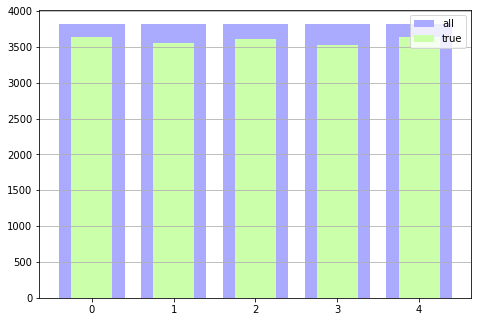

In [207]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y1, color="#AAAAFF", width=0.8)
ax.bar(x,y2, color="#CCFFAA", width=0.5)
ax.legend(["all", "true"])
plt.grid("on", axis="y")
plt.show()